In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder


In [64]:

# Load the data
deliveries = pd.read_csv('deliveries.csv')


In [65]:

# Display basic information about the dataset
print(deliveries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17380 entries, 0 to 17379
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                17380 non-null  int64  
 1   season                  17380 non-null  object 
 2   start_date              17380 non-null  object 
 3   venue                   17380 non-null  object 
 4   innings                 17380 non-null  int64  
 5   ball                    17380 non-null  float64
 6   batting_team            17380 non-null  object 
 7   bowling_team            17380 non-null  object 
 8   striker                 17380 non-null  object 
 9   non_striker             17380 non-null  object 
 10  bowler                  17380 non-null  object 
 11  runs_off_bat            17380 non-null  int64  
 12  extras                  17380 non-null  int64  
 13  wides                   431 non-null    float64
 14  noballs                 42 non-null   

In [66]:
# Drop irrelevant columns
columns_to_drop = ['start_date', 'other_wicket_type', 'other_player_dismissed']
deliveries_cleaned = deliveries.drop(columns=columns_to_drop, axis=1)


In [67]:
# Check for missing values
print(deliveries_cleaned.isnull().sum())

# Handle missing values, for example, fill NaN values in 'wides', 'noballs', etc. with 0
deliveries_cleaned[['wides', 'noballs', 'byes', 'legbyes', 'penalty']] = deliveries_cleaned[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].fillna(0)


match_id                0
season                  0
venue                   0
innings                 0
ball                    0
batting_team            0
bowling_team            0
striker                 0
non_striker             0
bowler                  0
runs_off_bat            0
extras                  0
wides               16949
noballs             17338
byes                17354
legbyes             17263
penalty             17379
wicket_type         16889
player_dismissed    16889
dtype: int64


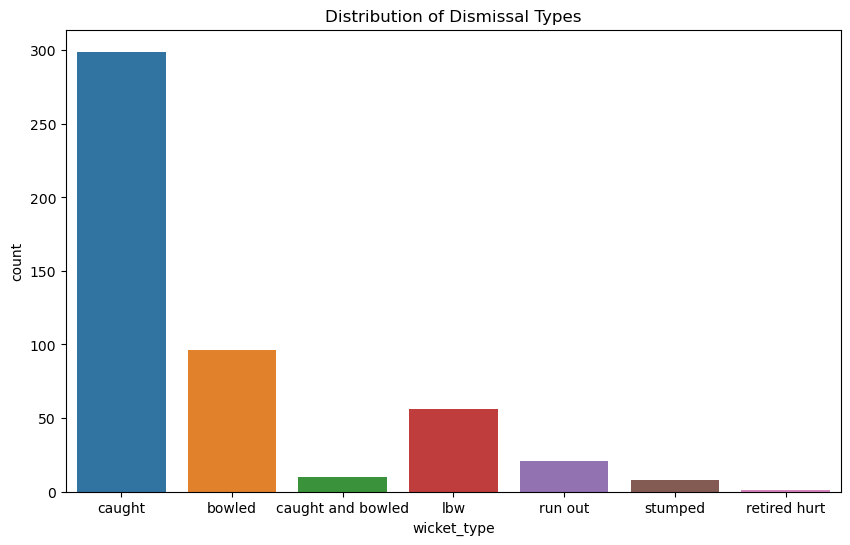

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x='wicket_type', data=deliveries_cleaned)
plt.title('Distribution of Dismissal Types')
plt.show()


caught               299
bowled                96
lbw                   56
run out               21
caught and bowled     10
stumped                8
retired hurt           1
Name: wicket_type, dtype: int64


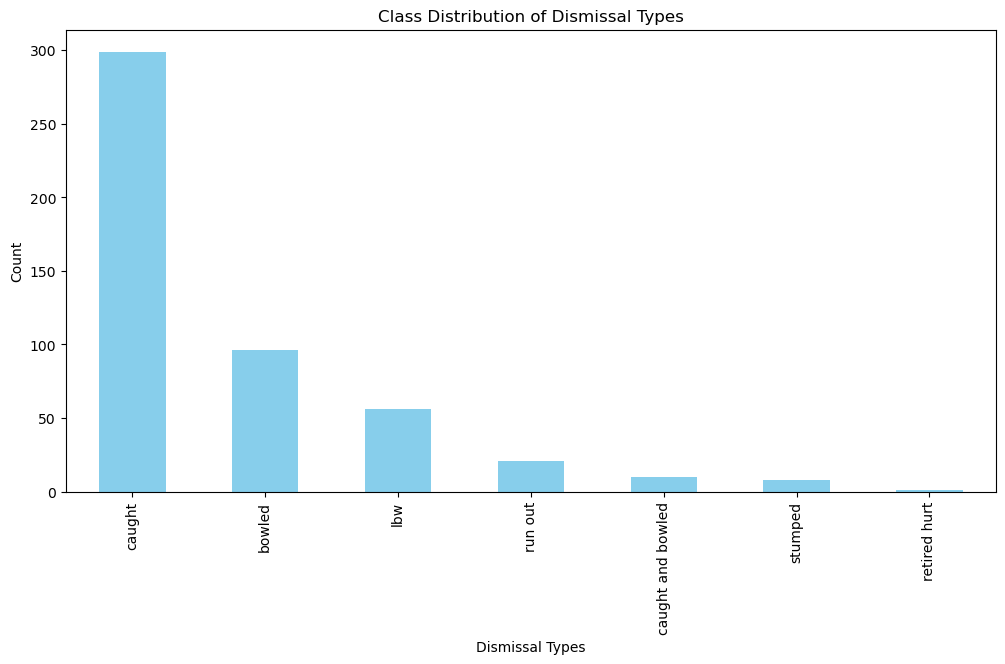

In [69]:
dismissal_counts = deliveries_cleaned['wicket_type'].value_counts()
print(dismissal_counts)

# Visualize class distribution
plt.figure(figsize=(12, 6))
dismissal_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Dismissal Types')
plt.xlabel('Dismissal Types')
plt.ylabel('Count')
plt.show()


C:\Users\nawal\AppData\Local\Temp\ipykernel_14592\2937744608.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = deliveries_cleaned.corr()


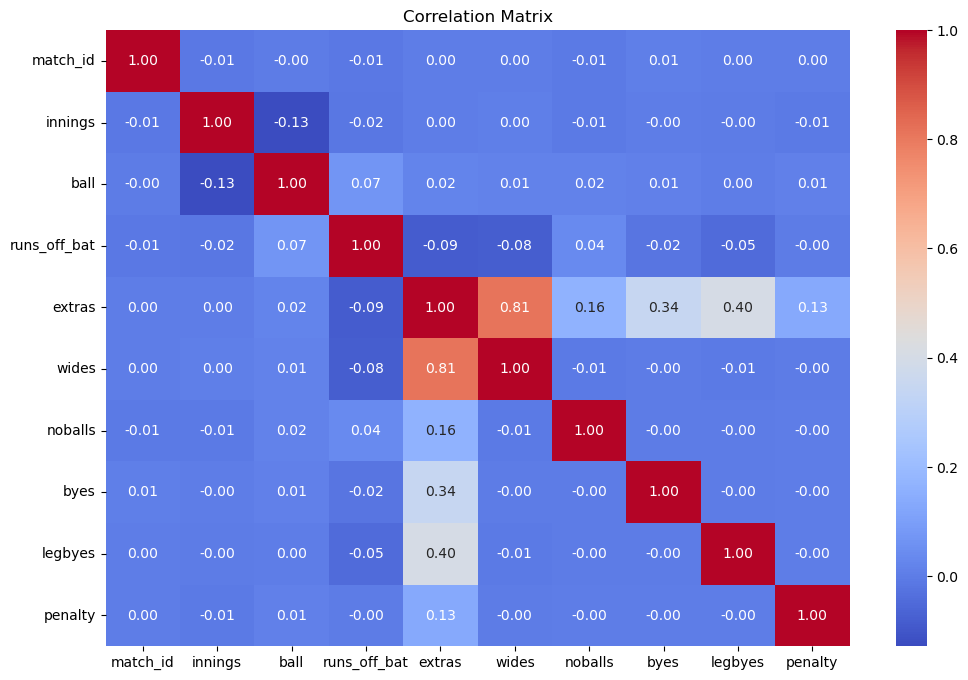

In [70]:
# Check correlation between numerical variables
correlation_matrix = deliveries_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [71]:
#print correlation values of all values in delivery_cleaned
print(correlation_matrix)


              match_id   innings      ball  runs_off_bat    extras     wides  \
match_id      1.000000 -0.010169 -0.001176     -0.011107  0.002806  0.000611   
innings      -0.010169  1.000000 -0.128515     -0.016566  0.000750  0.004145   
ball         -0.001176 -0.128515  1.000000      0.068771  0.020641  0.014400   
runs_off_bat -0.011107 -0.016566  0.068771      1.000000 -0.088557 -0.083440   
extras        0.002806  0.000750  0.020641     -0.088557  1.000000  0.813628   
wides         0.000611  0.004145  0.014400     -0.083440  0.813628  1.000000   
noballs      -0.007721 -0.007201  0.015436      0.038202  0.164771 -0.006389   
byes          0.007459 -0.000480  0.010244     -0.020831  0.343716 -0.004207   
legbyes       0.001818 -0.000784  0.002790     -0.045467  0.404322 -0.009182   
penalty       0.002129 -0.006914  0.010933     -0.004876  0.131721 -0.000985   

               noballs      byes   legbyes   penalty  
match_id     -0.007721  0.007459  0.001818  0.002129  
innings  

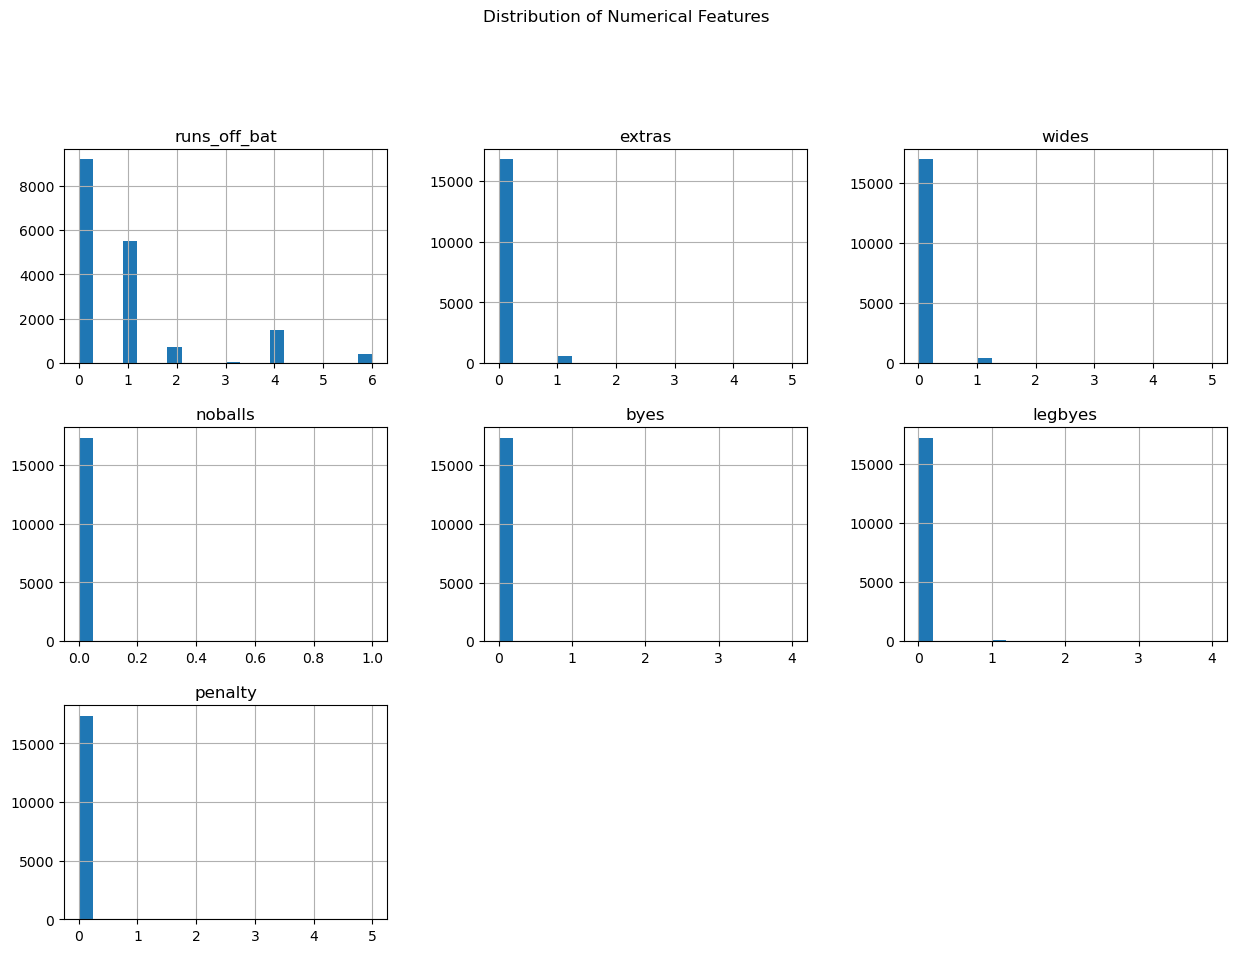

In [72]:
# Define numerical features
num_features = ['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty']

# Visualize distribution of numerical features
deliveries_cleaned[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.show()


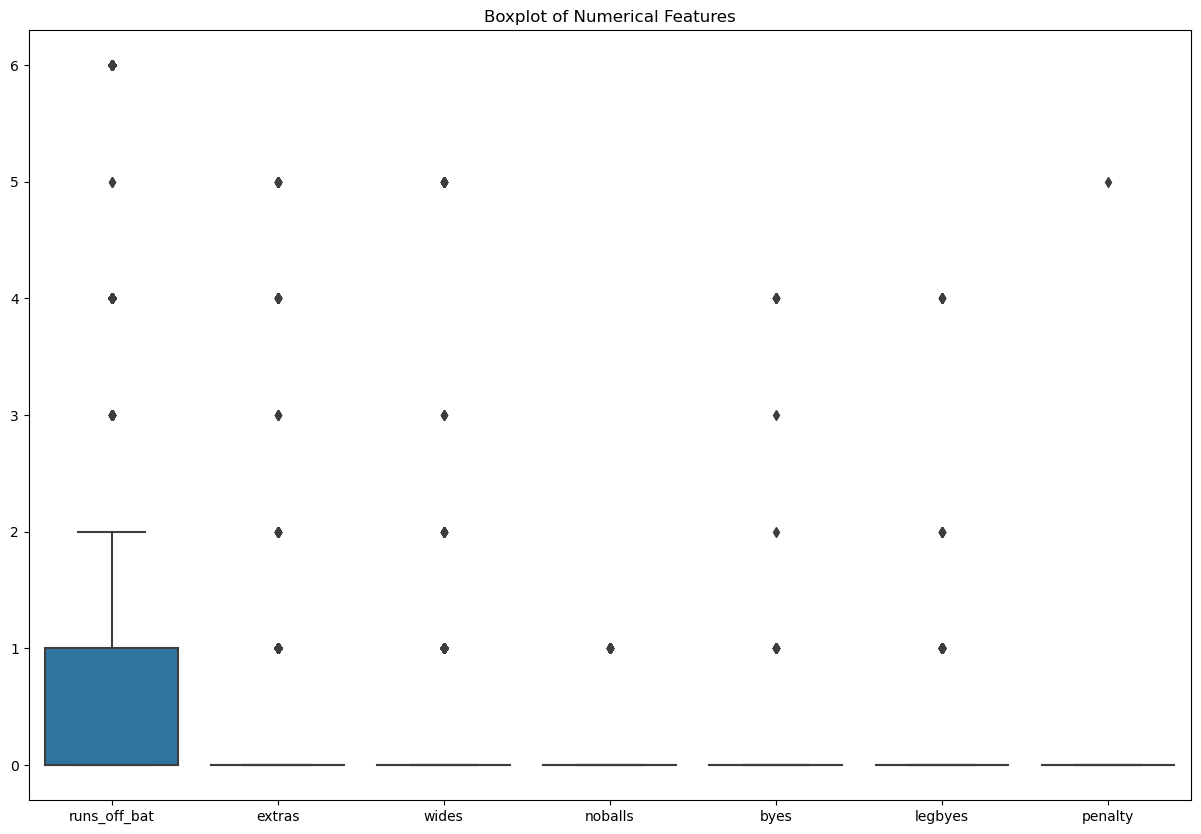

In [73]:
# Boxplot for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=deliveries_cleaned[num_features])
plt.title('Boxplot of Numerical Features')
plt.show()


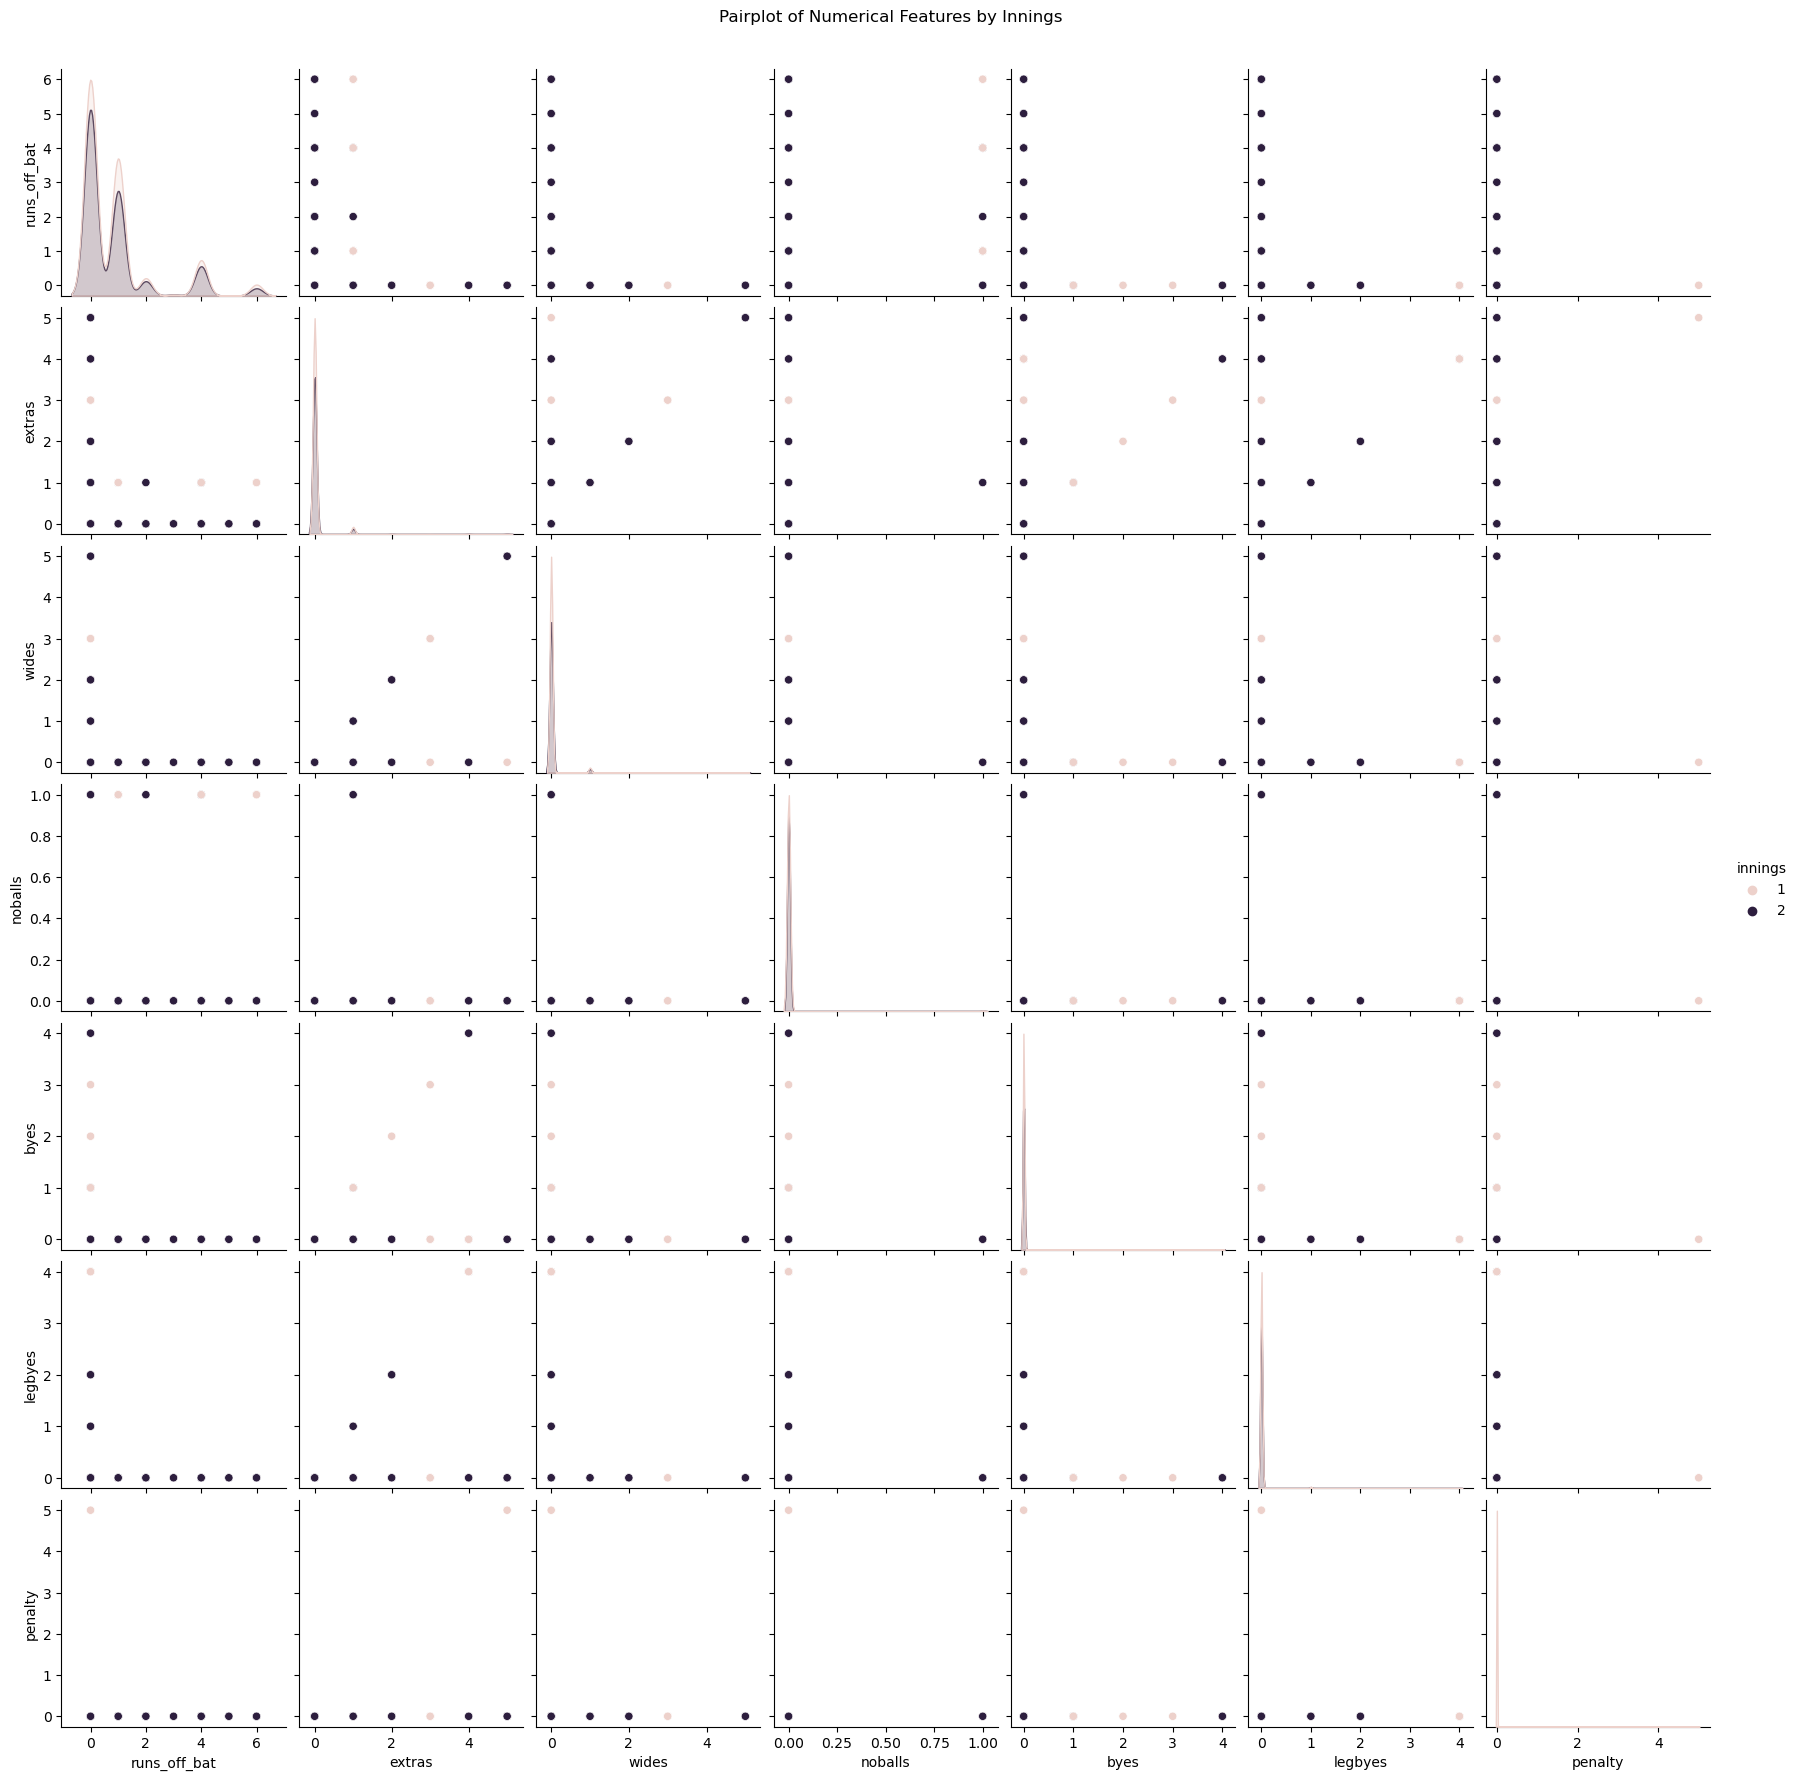

In [74]:
# Pairplot for selected numerical features
sns.pairplot(deliveries_cleaned[['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty', 'innings']], hue='innings')
plt.suptitle('Pairplot of Numerical Features by Innings', y=1.02)
plt.show()


In [75]:
# Handling missing values
deliveries_cleaned['wides'].fillna(0, inplace=True)
deliveries_cleaned['noballs'].fillna(0, inplace=True)
deliveries_cleaned['byes'].fillna(0, inplace=True)
deliveries_cleaned['legbyes'].fillna(0, inplace=True)
deliveries_cleaned['penalty'].fillna(0, inplace=True)

# Considering 'wicket_type' and 'player_dismissed,' dropping rows with missing values
deliveries_cleaned.dropna(subset=['wicket_type', 'player_dismissed'], inplace=True)


In [76]:

# Normalize numerical features
scaler = StandardScaler()
deliveries_cleaned[num_features] = scaler.fit_transform(deliveries_cleaned[num_features])


In [77]:

# Separate majority and minority classes
majority_class = deliveries_cleaned[deliveries_cleaned['wicket_type'] == 'caught']
minority_classes = deliveries_cleaned[deliveries_cleaned['wicket_type'] != 'caught']

# Upsample minority classes to match majority class
minority_upsampled = resample(minority_classes, replace=True, n_samples=len(majority_class), random_state=42)

# Concatenate majority class with upsampled minority classes
deliveries_balanced = pd.concat([majority_class, minority_upsampled])

# Check the class distribution after balancing
print(deliveries_balanced['wicket_type'].value_counts())


caught               299
bowled               162
lbw                   79
run out               28
caught and bowled     19
stumped               11
Name: wicket_type, dtype: int64


In [78]:
# Feature: 'dismissal_type' indicating the dismissal type of a player
deliveries_balanced['dismissal_type'] = deliveries_balanced['wicket_type']


In [79]:

# Encode categorical variables
label_encoder = LabelEncoder()

# Example: Encode 'batting_team' and 'bowling_team'
deliveries_balanced['batting_team_encoded'] = label_encoder.fit_transform(deliveries_balanced['batting_team'])
deliveries_balanced['bowling_team_encoded'] = label_encoder.transform(deliveries_balanced['bowling_team'])

# Check the updated DataFrame with encoded features
print(deliveries_balanced[['batting_team', 'batting_team_encoded', 'bowling_team', 'bowling_team_encoded']].head())


    batting_team  batting_team_encoded bowling_team  bowling_team_encoded
47       England                     3  New Zealand                     6
78       England                     3  New Zealand                     6
103      England                     3  New Zealand                     6
202      England                     3  New Zealand                     6
235      England                     3  New Zealand                     6


In [80]:
# Numerical features (after normalization)
numerical_features = ['runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty']

# Encoded categorical variables
categorical_features = ['batting_team_encoded', 'bowling_team_encoded']

# Final feature set
final_features = deliveries_balanced[numerical_features + categorical_features]

# Target variable
target_variable = deliveries_balanced['dismissal_type']


In [81]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = final_features
y = target_variable

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (478, 9) (478,)
Test set shape: (120, 9) (120,)


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.49166666666666664
Classification Report:
                    precision    recall  f1-score   support

           bowled       0.46      0.35      0.40        34
           caught       0.52      0.71      0.60        62
caught and bowled       0.00      0.00      0.00         3
              lbw       0.25      0.06      0.09        18
          run out       0.67      1.00      0.80         2
          stumped       0.00      0.00      0.00         1

         accuracy                           0.49       120
        macro avg       0.32      0.35      0.31       120
     weighted avg       0.45      0.49      0.45       120



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.48333333333333334
Classification Report:
                    precision    recall  f1-score   support

           bowled       0.47      0.24      0.31        34
           caught       0.52      0.74      0.61        62
caught and bowled       0.00      0.00      0.00         3
              lbw       0.25      0.11      0.15        18
          run out       0.67      1.00      0.80         2
          stumped       0.00      0.00      0.00         1

         accuracy                           0.48       120
        macro avg       0.32      0.35      0.31       120
     weighted avg       0.45      0.48      0.44       120



In [84]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("Classification Report:\n", classification_report(y_test, knn_predictions))


KNN Accuracy: 0.48333333333333334
Classification Report:
                    precision    recall  f1-score   support

           bowled       0.43      0.26      0.33        34
           caught       0.52      0.74      0.61        62
caught and bowled       0.00      0.00      0.00         3
              lbw       0.33      0.11      0.17        18
          run out       0.50      0.50      0.50         2
          stumped       0.00      0.00      0.00         1

         accuracy                           0.48       120
        macro avg       0.30      0.27      0.27       120
     weighted avg       0.45      0.48      0.44       120



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [85]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Trees
dt_param_grid = {'criterion': ['gini', 'entropy'],
                 'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=3)
dt_grid_search.fit(X_train, y_train)

# Best hyperparameters for Decision Trees
best_dt_params = dt_grid_search.best_params_

# Evaluate the model with best hyperparameters
dt_best_model = dt_grid_search.best_estimator_
dt_predictions = dt_best_model.predict(X_test)

# Model Evaluation
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.49166666666666664
Classification Report:
                    precision    recall  f1-score   support

           bowled       0.46      0.35      0.40        34
           caught       0.52      0.71      0.60        62
caught and bowled       0.00      0.00      0.00         3
              lbw       0.25      0.06      0.09        18
          run out       0.67      1.00      0.80         2
          stumped       0.00      0.00      0.00         1

         accuracy                           0.49       120
        macro avg       0.32      0.35      0.31       120
     weighted avg       0.45      0.49      0.45       120



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# Hyperparameter tuning for Random Forest
rf_param_grid = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20, 30, 40, 50],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_rf_params = rf_grid_search.best_params_

# Evaluate the model with best hyperparameters
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(X_test)

# Model Evaluation
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.5166666666666667
Classification Report:
                    precision    recall  f1-score   support

           bowled       0.50      0.21      0.29        34
           caught       0.53      0.84      0.65        62
caught and bowled       0.00      0.00      0.00         3
              lbw       0.25      0.06      0.09        18
          run out       0.67      1.00      0.80         2
          stumped       0.00      0.00      0.00         1

         accuracy                           0.52       120
        macro avg       0.32      0.35      0.30       120
     weighted avg       0.46      0.52      0.44       120



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# Hyperparameter tuning for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'p': [1, 2]}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3)
knn_grid_search.fit(X_train, y_train)

# Best hyperparameters for KNN
best_knn_params = knn_grid_search.best_params_

# Evaluate the model with best hyperparameters
knn_best_model = knn_grid_search.best_estimator_
knn_predictions = knn_best_model.predict(X_test)

# Model Evaluation
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("Classification Report:\n", classification_report(y_test, knn_predictions))


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN Accuracy: 0.5166666666666667
Classification Report:
                    precision    recall  f1-score   support

           bowled       0.50      0.35      0.41        34
           caught       0.54      0.73      0.62        62
caught and bowled       0.00      0.00      0.00         3
              lbw       0.43      0.17      0.24        18
          run out       0.67      1.00      0.80         2
          stumped       0.00      0.00      0.00         1

         accuracy                           0.52       120
        macro avg       0.36      0.37      0.35       120
     weighted avg       0.49      0.52      0.49       120



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [104]:
# Manually created sample inputs with realistic values
sample_input_1 = [0.2, 0.1, -0.05, -0.02, 1.0, 0.0, 0.0, 5, 8]  # Adjust values based on your data
sample_input_2 = [0.1, 0.0, -0.03, -0.01, 0.0, 1.0, 0.0, 2, 3]  # Adjust values based on your data
sample_input_3 = [-0.3, -0.2, 0.15, 0.05, 0.0, 0.0, 1.0, 6, 1]  # Adjust values based on your data

# Convert to DataFrame for consistency
sample_inputs = pd.DataFrame([sample_input_1, sample_input_2, sample_input_3],
                             columns=X_test.columns)

# Display the realistic sample inputs
print("Realistic Sample Inputs:")
print(sample_inputs)

# Predictions for each model
dt_predictions = dt_best_model.predict(sample_inputs)
rf_predictions = rf_best_model.predict(sample_inputs)
knn_predictions = knn_best_model.predict(sample_inputs)

# Display predictions
print("\nDecision Tree Predictions:")
print(dt_predictions)

print("\nRandom Forest Predictions:")
print(rf_predictions)

print("\nKNN Predictions:")
print(knn_predictions)


Realistic Sample Inputs:
   runs_off_bat  extras  wides  noballs  byes  legbyes  penalty  \
0           0.2     0.1  -0.05    -0.02   1.0      0.0      0.0   
1           0.1     0.0  -0.03    -0.01   0.0      1.0      0.0   
2          -0.3    -0.2   0.15     0.05   0.0      0.0      1.0   

   batting_team_encoded  bowling_team_encoded  
0                     5                     8  
1                     2                     3  
2                     6                     1  

Decision Tree Predictions:
['stumped' 'bowled' 'caught']

Random Forest Predictions:
['caught' 'caught' 'caught']

KNN Predictions:
['stumped' 'bowled' 'caught']
